<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default matplotlib plot style to 'bmh'
mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = w.wrangle()
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00


In [4]:
# Columns for exploration
vehicle_cols = [
    'crash_id',
    'person_injury_severity',
    'crash_date',
    'crash_month',
    'crash_time',
    'crash_year',
    'day_of_week',
    "$1000_damage_to_any_one_person's_property",
    'license_plate_state',
    'vehicle_body_style',
    'vehicle_color',
    'vehicle_damage_rating_1_-_area',
    'vehicle_damage_rating_1_-_direction_of_force',
    'vehicle_damage_rating_1_-_severity',
    'vehicle_damage_rating_2_-_area',
    'vehicle_damage_rating_2_-_direction_of_force',
    'vehicle_damage_rating_2_-_severity',
    'vehicle_defect_1',
    'vehicle_hit_and_run_flag',
    'vehicle_make',
    'vehicle_model_name',
    'vehicle_model_year',
    'vehicle_towed_by',
    'vehicle_towed_to'
]

In [5]:
# Create a filtered dataset for this specific exploration
vehicle_df = master[vehicle_cols]
vehicle_df.shape

(14174, 24)

In [6]:
# Split data
train, validate, test = w.split(vehicle_df)

<div style='background-color:orange'>
<a id='Questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#question1'>Question 1</a>
    <li><a href='#question2'>Question 2</a>
    </li>
</div>

<a id='questionsorientation'></a>
<h3><b><i>
    Questions Orientation
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

- TOPIC: Vehicle Info
    1. Does condition of motorcycle matter?
    2. Is there a particular motorcycle brand?

---

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does condition of motorcycle matter?

<b>H$_0$:</b> The condition of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The condition of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

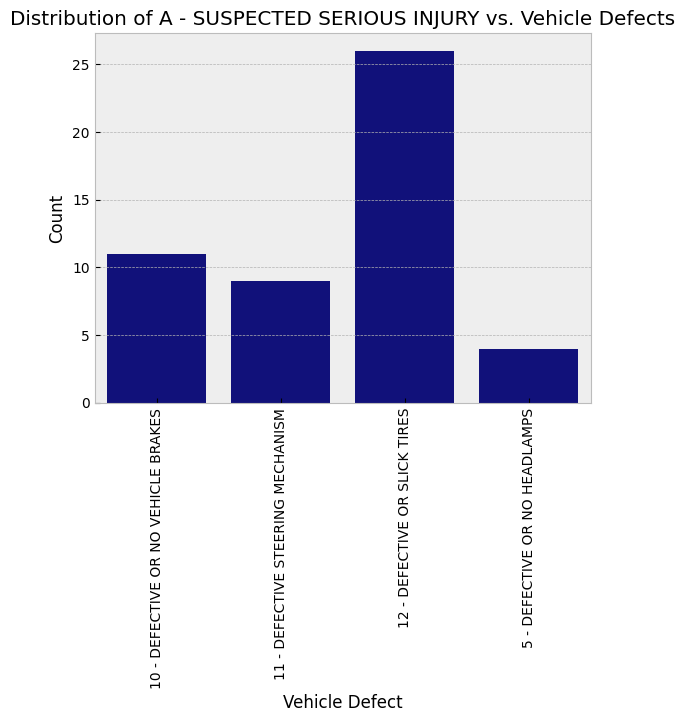

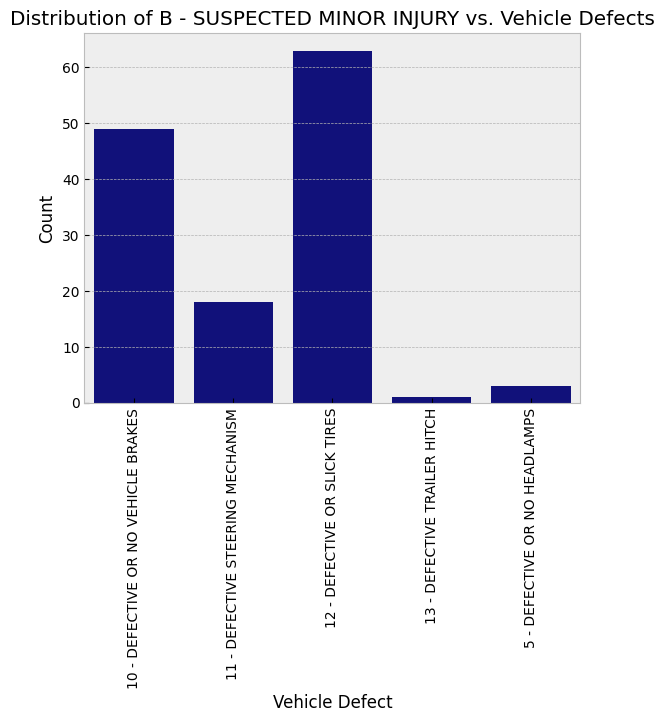

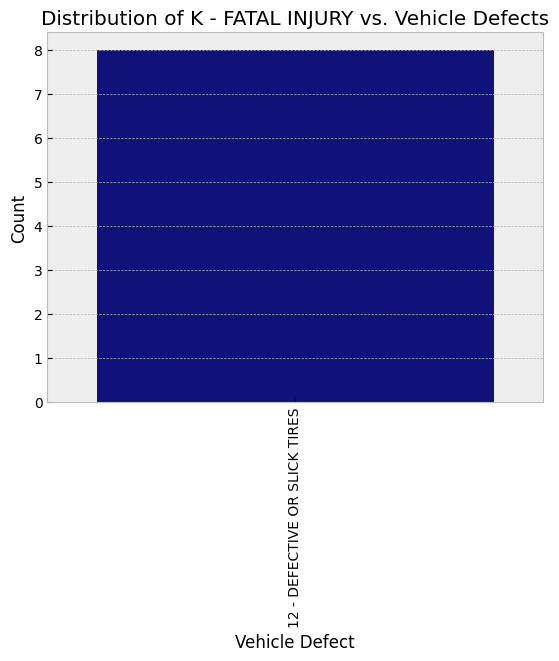

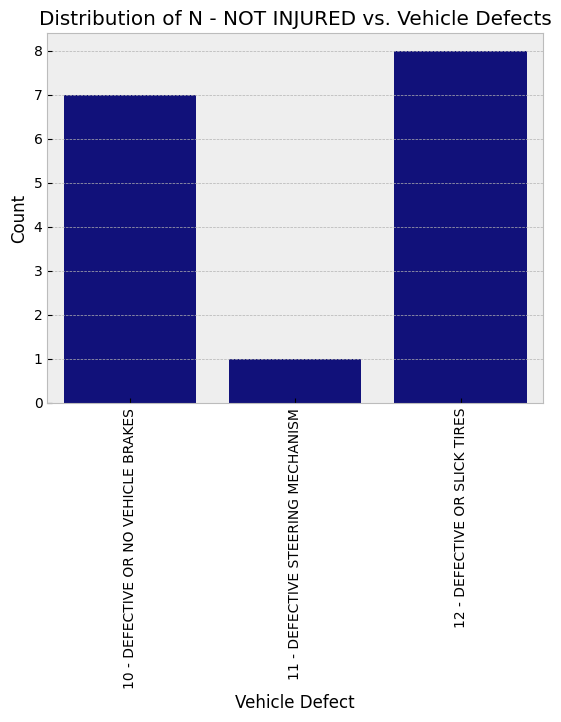

In [8]:
# Visualize injury severity by motorcycle defect type
for val in train.person_injury_severity.unique():
    defect_counts = train[train.person_injury_severity == val][train.vehicle_defect_1 != 'no data'][~train.vehicle_defect_1.str.startswith('98')].groupby(by=train.vehicle_defect_1)['person_injury_severity'].count()
    sns.barplot(x=defect_counts.index, y=defect_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Vehicle Defects')
    plt.xlabel('Vehicle Defect')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [14]:
# Stat test variables using a chi2_contingency test
for val in train.person_injury_severity.unique():
    for vals in train[train.vehicle_defect_1 != 'no data'][~train.vehicle_defect_1.str.startswith('98')].vehicle_defect_1.unique():
        observed = pd.crosstab(train.vehicle_defect_1 == vals, train.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mDefect:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mDefect:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Defect: 10 - DEFECTIVE OR NO VEHICLE BRAKES
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 4.060265010106095
P-Value: 0.04390360883747562

========== ACCEPT NULL HYPOTHESIS ==========
Defect: 12 - DEFECTIVE OR SLICK TIRES
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.46111827920938553
P-Value: 0.4971018071903266

========== ACCEPT NULL HYPOTHESIS ==========
Defect: 11 - DEFECTIVE STEERING MECHANISM
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.06426493725886216
P-Value: 0.7998777658961135

========== ACCEPT NULL HYPOTHESIS ==========
Defect: 5 - DEFECTIVE OR NO HEADLAMPS
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 1.6433488079337395
P-Value: 0.19986661690756913

========== ACCEPT NULL HYPOTHESIS ==========
Defect: 13 - DEFECTIVE TRAILER HITCH
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== REJECT NULL HYPOTHESIS ==========
Defect: 10 - DEFECTIVE OR NO VEHICLE BRAKES
Injury: B - SUSPECTED MINOR INJURY

<b><i>
    REJECT NULL HYPOTHESIS - EXCEPTION!
</i></b>

The condition of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

<a id='question2'></a>
<h3><b><i>
    Question 2
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

2. Is there a particular motorcycle brand?

<b>H$_0$:</b> The motorcycle brand does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The motorcycle brand does make a significant difference in the injury severity of single motorcycle crashes in Texas.

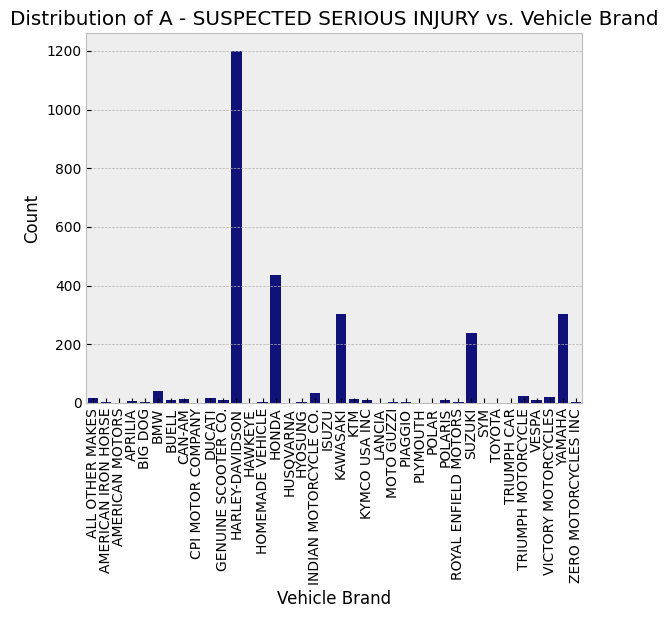

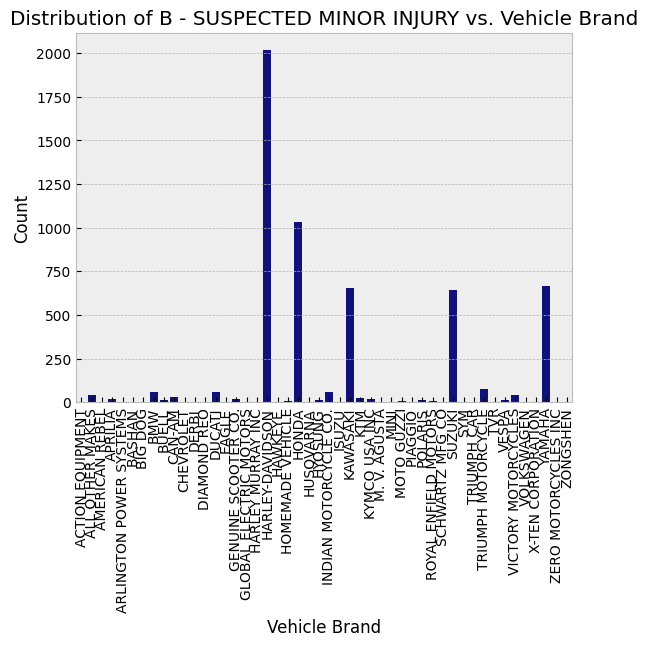

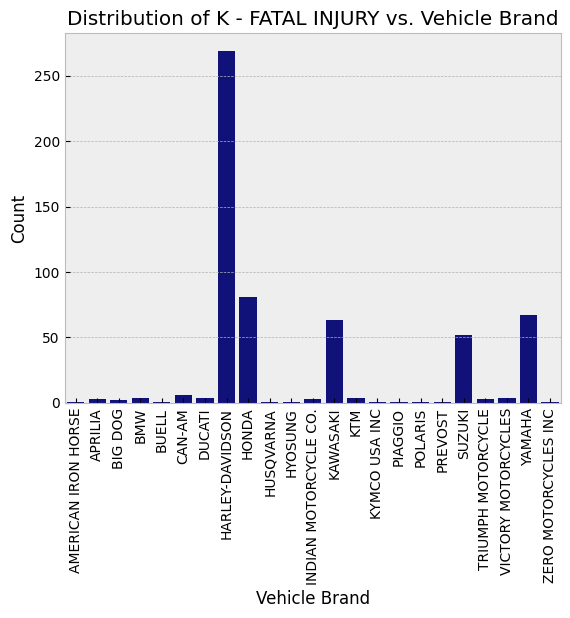

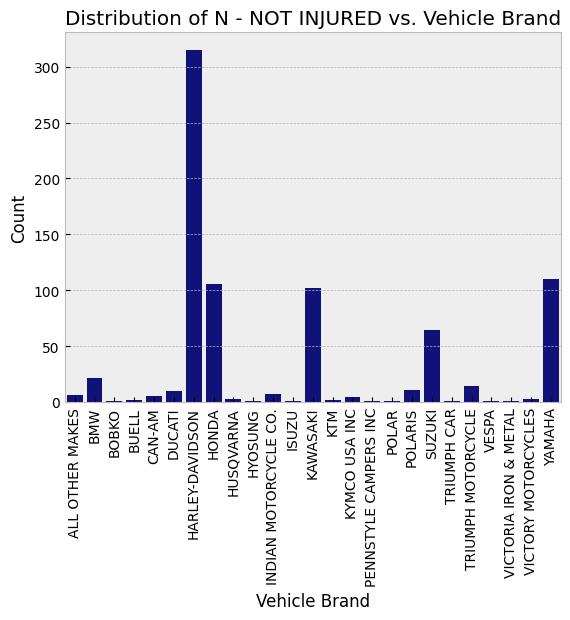

In [10]:
# Visualize injury severity by motorcycle brand
for val in train.person_injury_severity.unique():
    brand_counts = train[train.person_injury_severity == val][train.vehicle_make != 'no data'][~train.vehicle_make.str.startswith('UNKNOWN')][~train.vehicle_make.str.startswith('OTHER')].groupby(by=train.vehicle_make)['person_injury_severity'].count()
    sns.barplot(x=brand_counts.index, y=brand_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Vehicle Brand')
    plt.xlabel('Vehicle Brand')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [13]:
# Stat test variables using a chi2_contingency test
for vals in train[train.vehicle_make != 'no data'][~train.vehicle_make.str.startswith('UNKNOWN')][~train.vehicle_make.str.startswith('OTHER')].vehicle_make.unique():
    for val in train.person_injury_severity.unique():
        observed = pd.crosstab(train.vehicle_make == vals, train.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
Make: HARLEY-DAVIDSON
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 34.361388827396894
P-Value: 4.577141173977991e-09

========== REJECT NULL HYPOTHESIS ==========
Make: HARLEY-DAVIDSON
Injury: B - SUSPECTED MINOR INJURY
Statistic: 52.72440958159737
P-Value: 3.8379147747210026e-13

========== REJECT NULL HYPOTHESIS ==========
Make: HARLEY-DAVIDSON
Injury: K - FATAL INJURY
Statistic: 15.509470752534874
P-Value: 8.209291687058781e-05

========== ACCEPT NULL HYPOTHESIS ==========
Make: HARLEY-DAVIDSON
Injury: N - NOT INJURED
Statistic: 9.613679997453701e-05
P-Value: 0.9921769170727719

========== ACCEPT NULL HYPOTHESIS ==========
Make: HONDA
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 3.0131966830258925
P-Value: 0.08258926730029817

========== REJECT NULL HYPOTHESIS ==========
Make: HONDA
Injury: B - SUSPECTED MINOR INJURY
Statistic: 17.2381404656238
P-Value: 3.297494505595716e-05

========== ACCEPT NULL HYPOTHESIS ==========
Make: HONDA


========== ACCEPT NULL HYPOTHESIS ==========
Make: ALL OTHER MAKES
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.07803422299548779
P-Value: 0.779979259370742

========== ACCEPT NULL HYPOTHESIS ==========
Make: ALL OTHER MAKES
Injury: B - SUSPECTED MINOR INJURY
Statistic: 0.9419732442416403
P-Value: 0.33177088987789144

========== ACCEPT NULL HYPOTHESIS ==========
Make: ALL OTHER MAKES
Injury: K - FATAL INJURY
Statistic: 2.905087391183909
P-Value: 0.08830046744816432

========== ACCEPT NULL HYPOTHESIS ==========
Make: ALL OTHER MAKES
Injury: N - NOT INJURED
Statistic: 0.029410201864080228
P-Value: 0.8638353253349269

========== ACCEPT NULL HYPOTHESIS ==========
Make: AMERICAN IRON HORSE
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 2.3243355117125875
P-Value: 0.12736459822740412

========== ACCEPT NULL HYPOTHESIS ==========
Make: AMERICAN IRON HORSE
Injury: B - SUSPECTED MINOR INJURY
Statistic: 3.3391460924452567
P-Value: 0.06764970819027431

========== ACCEPT NULL HYPOTHESIS ====

========== ACCEPT NULL HYPOTHESIS ==========
Make: KYMCO USA INC
Injury: N - NOT INJURED
Statistic: 0.23752280500173925
P-Value: 0.6260010283368491

========== ACCEPT NULL HYPOTHESIS ==========
Make: HUSQVARNA
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.15882140433001987
P-Value: 0.6902439470106438

========== ACCEPT NULL HYPOTHESIS ==========
Make: HUSQVARNA
Injury: B - SUSPECTED MINOR INJURY
Statistic: 1.378953028153044
P-Value: 0.24027956523032704

========== ACCEPT NULL HYPOTHESIS ==========
Make: HUSQVARNA
Injury: K - FATAL INJURY
Statistic: 0.020020344405526323
P-Value: 0.8874802792494316

========== REJECT NULL HYPOTHESIS ==========
Make: HUSQVARNA
Injury: N - NOT INJURED
Statistic: 6.951254644276629
P-Value: 0.00837604694747332

========== ACCEPT NULL HYPOTHESIS ==========
Make: TOYOTA
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.23462216392333685
P-Value: 0.628117543062565

========== ACCEPT NULL HYPOTHESIS ==========
Make: TOYOTA
Injury: B - SUSPECTED MINOR INJURY


========== ACCEPT NULL HYPOTHESIS ==========
Make: HARLEY MURRAY INC
Injury: B - SUSPECTED MINOR INJURY
Statistic: 0.8114732077892133
P-Value: 0.3676850545444914

========== ACCEPT NULL HYPOTHESIS ==========
Make: HARLEY MURRAY INC
Injury: K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: HARLEY MURRAY INC
Injury: N - NOT INJURED
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: CHEVROLET
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.010143410495587006
P-Value: 0.9197771006259987

========== ACCEPT NULL HYPOTHESIS ==========
Make: CHEVROLET
Injury: B - SUSPECTED MINOR INJURY
Statistic: 0.2469615528854231
P-Value: 0.6192227142766278

========== ACCEPT NULL HYPOTHESIS ==========
Make: CHEVROLET
Injury: K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: CHEVROLET
Injury: N - NOT INJURED
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make

========== ACCEPT NULL HYPOTHESIS ==========
Make: VICTORIA IRON & METAL
Injury: K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: VICTORIA IRON & METAL
Injury: N - NOT INJURED
Statistic: 2.2947032218002428
P-Value: 0.12981602183280525

========== ACCEPT NULL HYPOTHESIS ==========
Make: EAGLE
Injury: A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: EAGLE
Injury: B - SUSPECTED MINOR INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: EAGLE
Injury: K - FATAL INJURY
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make: EAGLE
Injury: N - NOT INJURED
Statistic: 0.0
P-Value: 1.0



<b><i>
    REJECT NULL HYPOTHESIS FOR SOME!
</i></b>

The motorcycle brand does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- REJECT NULL ==> MAKE (Injury Type)
    - HARLEY-DAVIDSON (BAK)
    - HONDA (BN)
    - SUZUKI (BAN)
    - BMW (N)
    - TRIUMPH (A)
    - POLARIS (BN)
    - DUCATI (A)
    - HUSQVARNA (N)

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>